# 3 Dimensionality Reduction

In [1]:
import numpy
import matplotlib.pyplot as plt

import scipy.linalg

import project_module as pm

inputFile = './input/trainData.txt'

# restart kernel
import importlib
importlib.reload(pm)

<module 'project_module' from 'c:\\Users\\Alesc\\Documents\\2 Scuola\\Universita\\1 Magistrale\\I anno\\7 Machine Learning and Pattern Recognitions\\Project\\project_module.py'>

- new matrix with centered data (function)

In [7]:
def compute_mu_C(D):
    mu = pm.vcol(D.mean(1))
    DC = D - mu
    C1 = (DC @ (D-mu).T) / float(D.shape[1])
    C = numpy.dot(DC, DC.T) / float(DC.shape[1])
    return mu, C

In [8]:
# Change default font size - comment to use default values
plt.rc('font', size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

D, L = pm.load(inputFile)

## **PCA**
- compute PCA (function)

In [5]:
def compute_pca(D, m):

    mu, C = compute_mu_C(D)
    U, s, Vh = numpy.linalg.svd(C)
    P = U[:, 0:m]
    return P

- apply PCA (function)
1. project the matrix on the **m** PCA directions

In [3]:
def apply_pca(P, D):
    return P.T @ D

- apply functions

In [9]:
m = 6       # 6 PCA directions

mu, C = compute_mu_C(D)
print(mu)
print(C)
P = compute_pca(D, m)
print(P)
DP = apply_pca(P, D)

[[ 0.00170711]
 [ 0.00503903]
 [-0.00560753]
 [ 0.00109537]
 [-0.00700025]
 [ 0.00910515]]
[[ 1.00134304e+00  5.16755817e-03  1.76746375e-03  1.45268757e-02
   1.00066790e-02 -1.29591239e-02]
 [ 5.16755817e-03  9.98352699e-01 -1.58354137e-02 -4.40650280e-04
  -4.01307317e-03 -8.17687100e-04]
 [ 1.76746375e-03 -1.58354137e-02  1.00248180e+00 -4.37060381e-01
  -2.68600594e-02  6.34388503e-03]
 [ 1.45268757e-02 -4.40650280e-04 -4.37060381e-01  9.90293894e-01
   2.53357434e-02  8.26930215e-03]
 [ 1.00066790e-02 -4.01307317e-03 -2.68600594e-02  2.53357434e-02
   1.00119747e+00  8.75793087e-04]
 [-1.29591239e-02 -8.17687100e-04  6.34388503e-03  8.26930215e-03
   8.75793087e-04  9.97223742e-01]]
[[-0.02259492  0.75978143  0.00537837 -0.11213122  0.63943662  0.027205  ]
 [-0.02437891  0.14393192  0.70677389 -0.6293342  -0.28706901 -0.02626371]
 [ 0.70911684  0.03635837 -0.04394683 -0.04142496  0.00480861 -0.7015418 ]
 [-0.69919956 -0.03170131  0.01228318  0.04041039  0.05020234 -0.7112038 ]
 [

(test)

In [7]:
print(DP.shape[0])
print(D.shape[0])

print(DP.shape[1])
print(D.shape[1])

6
6
6000
6000


- split classes 

In [10]:
DP0 = DP[:, L==0]
DP1 = DP[:, L==1]

D0 = D[:, L==0]
D1 = D[:, L==1]

In [ ]:
import utils.plot as plot

plot.plot_hist_DR(DP0, DP1, m=6, method="PCA")

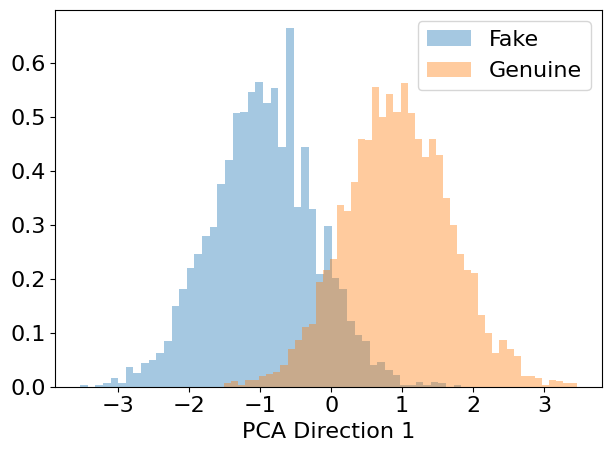

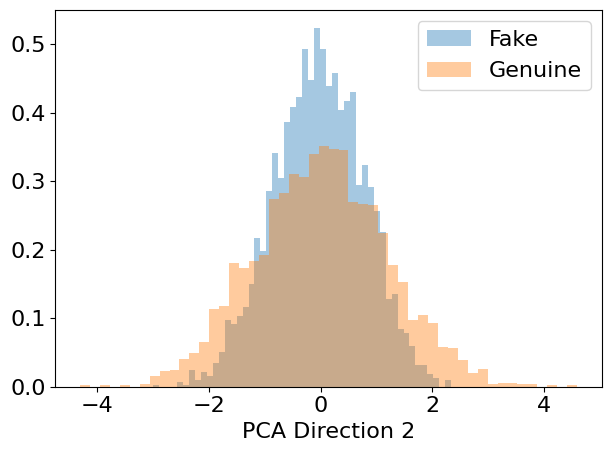

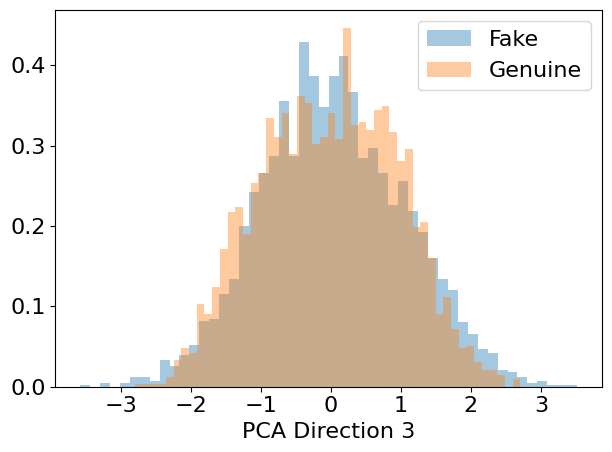

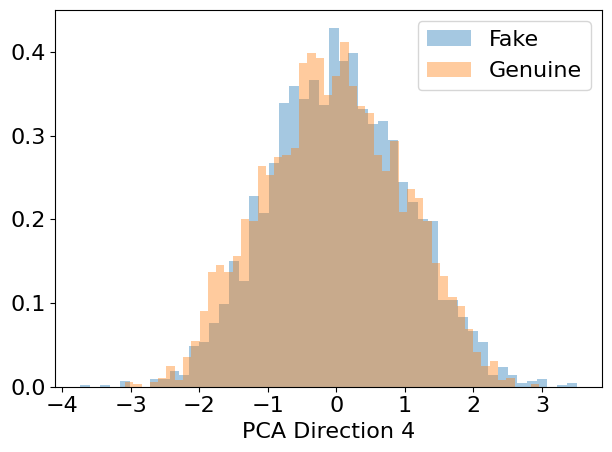

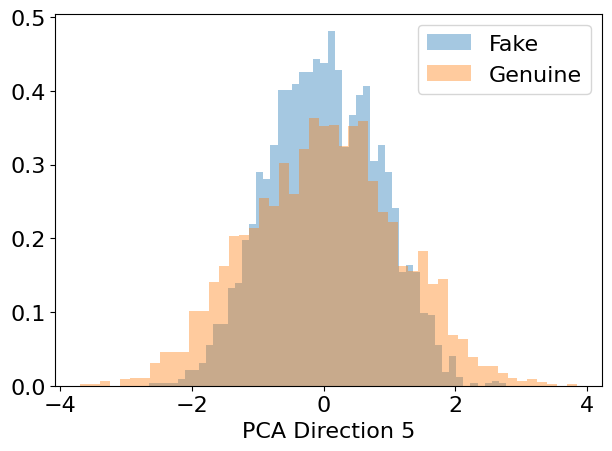

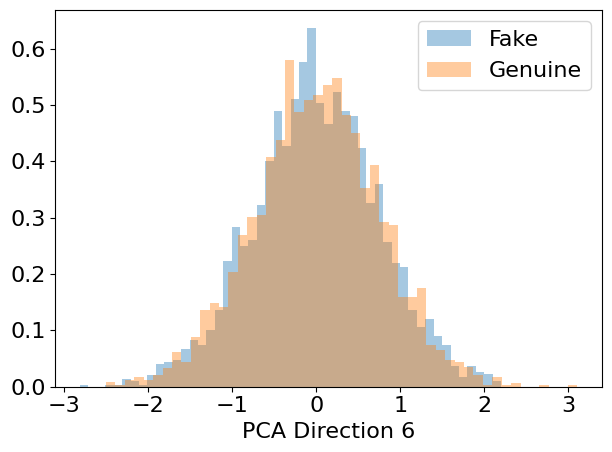

In [43]:
pm.plot_hist(DP0, DP1, m=6, method='PCA')

In [9]:
def plot_PCA_hist_one_for_all(D, L):

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
    D0 = D[:, L==0]
    D1 = D[:, L==1]

    hFea = {
        0: 'PCA Direction 1',
        1: 'PCA Direction 2',
        2: 'PCA Direction 3',
        3: 'PCA Direction 4',
        4: 'PCA Direction 5',
        5: 'PCA Direction 6'
    }

    for dIdx in range(6):
        row_axs = 0 if dIdx < 3 else 1
        col_axs = dIdx%3

        axs[row_axs][col_axs].set_title(hFea[dIdx])
        axs[row_axs][col_axs].hist(D0[dIdx, :], bins = 40, density = True, alpha = 0.4, label = 'Fake')
        axs[row_axs][col_axs].hist(D1[dIdx, :], bins = 40, density = True, alpha = 0.4, label = 'Genuine')
        
        axs[row_axs][col_axs].legend(fontsize=12)

    fig.tight_layout()
    fig.savefig('./outputs/L3/pdf/PCA_hist.pdf')
    fig.savefig('./outputs/L3/jpg/PCA_hist.jpg')

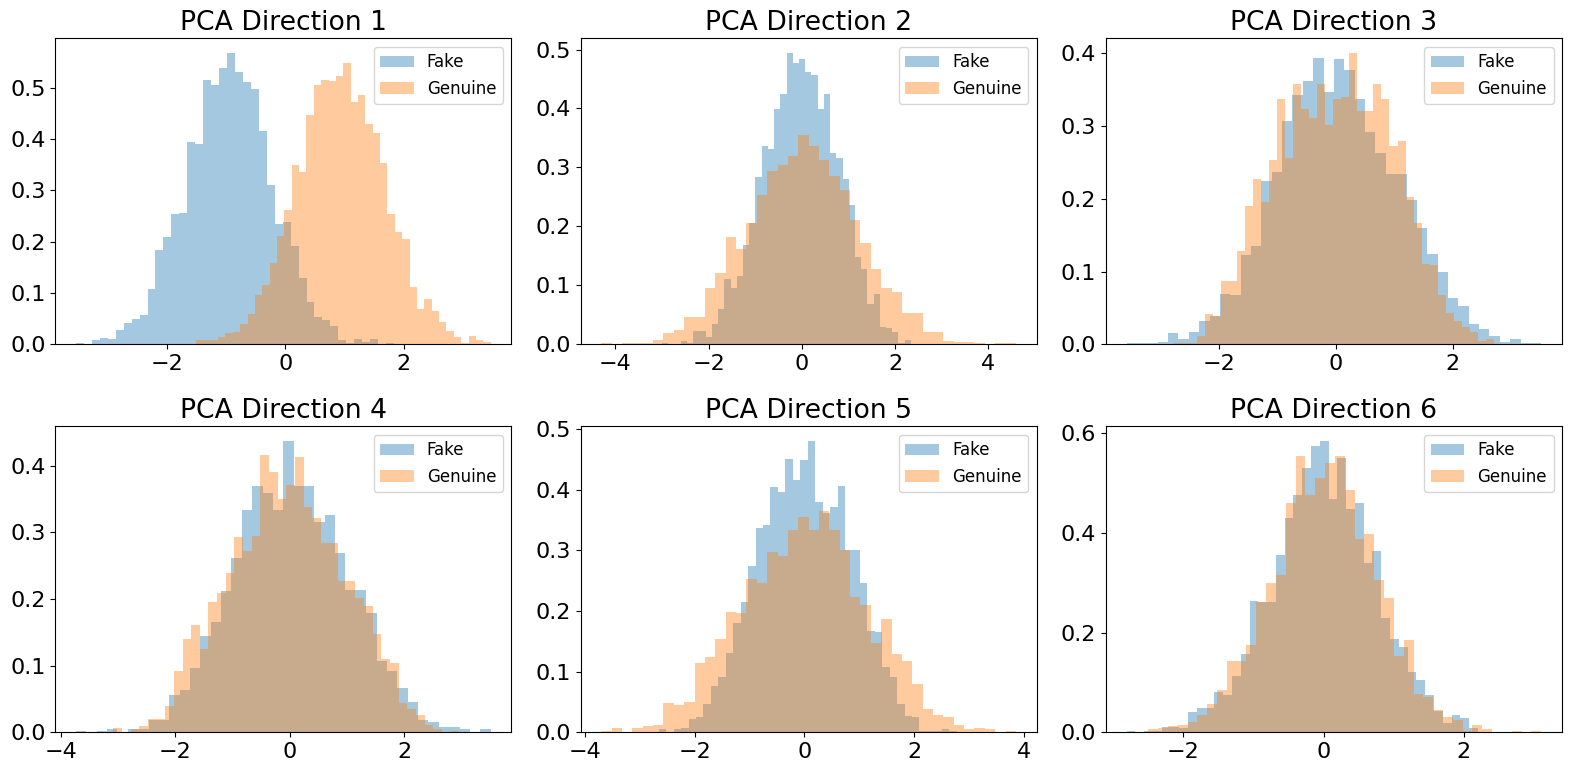

In [10]:
plot_hist = plot_PCA_hist_one_for_all
plot_hist(DP, L)

In [ ]:
pm.plot_scatter(DP0, DP1, m)

## **LDA**

In [6]:
def compute_Sb_Sw(D, L):
    Sb = 0
    Sw = 0
    muGlobal = pm.vcol(D.mean(1))
    for i in numpy.unique(L):
        DCls = D[:, L == i]
        mu = pm.vcol(DCls.mean(1))
        Sb += (mu - muGlobal) @ (mu - muGlobal).T * DCls.shape[1]
        Sw += (DCls - mu) @ (DCls - mu).T
    return Sb / D.shape[1], Sw / D.shape[1]

# generalized eigenvalue problem: Sb*w = λ*Sw*w
def compute_lda_geig(D, L, m):
    
    Sb, Sw = compute_Sb_Sw(D, L)
    s, U = scipy.linalg.eigh(Sb, Sw)    # solve the  generalized problem for hermitian matrices
    W = U[:, ::-1][:, 0:m]
    return W

# joint diagonalization: P1 = UΣ^(−1/2)U.T
def compute_lda_JointDiag(D, L, m):

    Sb, Sw = compute_Sb_Sw(D, L)

    U, s, _ = numpy.linalg.svd(Sw)
    P = numpy.dot(U * pm.vrow(1.0/(s**0.5)), U.T)

    Sb2 = numpy.dot(P, numpy.dot(Sb, P.T))

    U2, s2, _ = numpy.linalg.svd(Sb2)

    P2 = U2[:, 0:m]     # m highest eigenvalues of the matrix corresponding to the eigenvectors of Sb2
    return numpy.dot(P2.T, P).T

def apply_lda(U, D):
    return U.T @ D

In [10]:
#D, L = pm.load(inputFile)
U = compute_lda_geig(D, L, m = 1)
print("U:\n", U)
V = compute_lda_JointDiag(D, L, m = 1)
print("V:\n", V)

DU = apply_lda(-U, D)

U:
 [[-0.01063821]
 [ 0.0134172 ]
 [-0.96566604]
 [ 0.96774246]
 [ 0.0217633 ]
 [-0.03289391]]
V:
 [[-0.01063821]
 [ 0.0134172 ]
 [-0.96566604]
 [ 0.96774246]
 [ 0.0217633 ]
 [-0.03289391]]


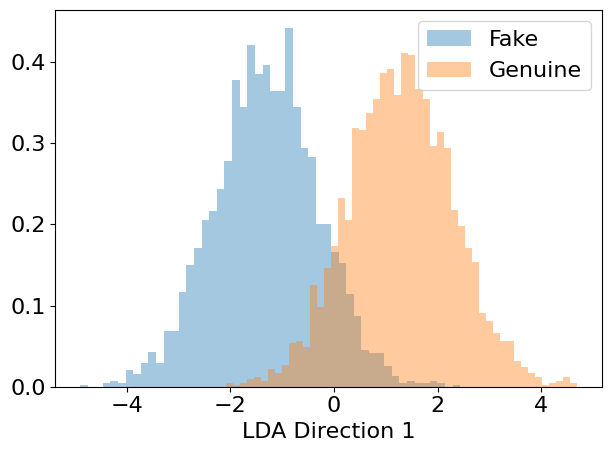

In [25]:
DU0 = DU[:, L==0]
DU1 = DU[:, L==1]

pm.plot_hist(DU0, DU1, 1, "LDA")

## **PCA and LDA for classification**

In [7]:
# DTR and LTR are model training data and labels
# DVAL and LVAL are validation data and labels
(DTR, LTR), (DVAL, LVAL) = pm.split_db_2to1(D, L)


In [8]:
ULDA = compute_lda_geig(DTR, LTR, m=1)     # trained model
print(ULDA)
DTR_lda = apply_lda(ULDA, DTR)
print(DTR_lda)



[[ 0.00633881]
 [-0.0101813 ]
 [ 0.94761369]
 [-0.96655337]
 [-0.02185809]
 [ 0.03813783]]
[[ 1.28859178 -0.24088742 -0.02100955 ...  0.14142402 -1.49292693
  -0.53472298]]


In [9]:
# Check if the Fake class samples are, on average, on the right of the Genuine samples on the training set. If not, we reverse ULDA and re-apply the transformation.
if DTR_lda[0, LTR==0].mean() > DTR_lda[0, LTR==1].mean():
    ULDA = -ULDA
    DTR_lda = apply_lda(ULDA, DTR)

DVAL_lda = apply_lda(ULDA, DVAL)

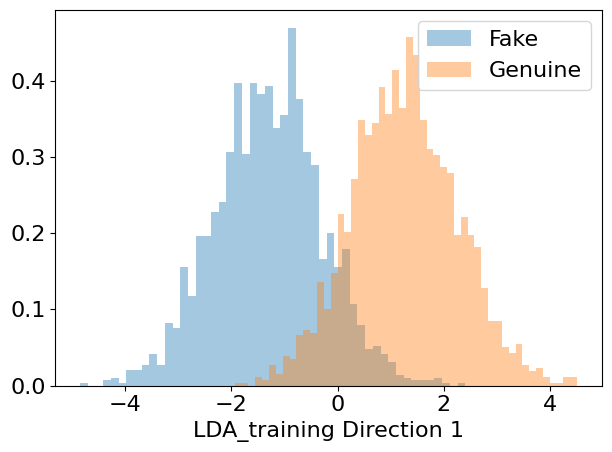

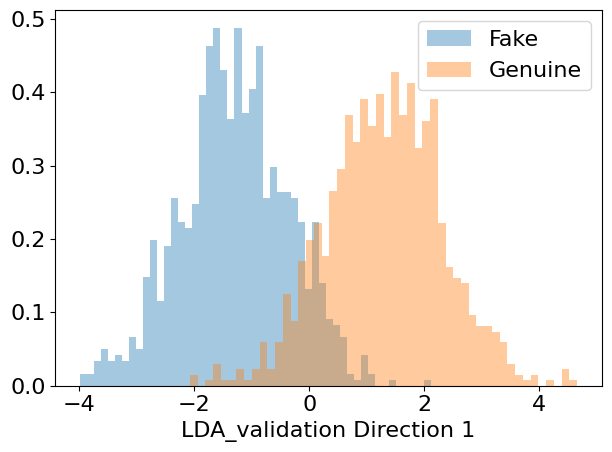

In [10]:
DTR_lda0 = DTR_lda[:, LTR==0]
DTR_lda1 = DTR_lda[:, LTR==1]
pm.plot_hist(DTR_lda0, DTR_lda1, 1, "LDA_training")

DVAL_lda0 = DVAL_lda[:, LVAL==0]
DVAL_lda1 = DVAL_lda[:, LVAL==1]
pm.plot_hist(DVAL_lda0, DVAL_lda1, 1, "LDA_validation")

In [11]:
threshold = (DTR_lda[0,LTR==0].mean() + DTR_lda[0,LTR==1].mean()) / 2.0 # Projected samples have only 1 dimension
print("Threshold: ", threshold)

PVAL = numpy.zeros(shape=LVAL.shape, dtype=numpy.int32)
PVAL[DVAL_lda[0] >= threshold] = 1
PVAL[DVAL_lda[0] < threshold] = 0
print('Labels:     ', LVAL)
print('Predictions:', PVAL)
print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
print('Error rate: %.2f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))
print('Accuracy: %.2f%%' % ( (PVAL == LVAL).sum() / float(LVAL.size) *100 ))


Threshold:  -0.018534376786207063
Labels:      [0 0 1 ... 0 0 0]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 186 (out of 2000 samples)
Error rate: 9.30%
Accuracy: 90.70%


PCA before LDA, with 1 PCA direction

In [15]:
def newU(D, U, L):
  if D[0, L==0].mean() > D[0, L==1].mean():
    return -U
  return U

In [22]:
def evaluate_model(DTR, DVAL, LTR, LVAL, m):
  print("**************************************************************")
  print('%d PCA dimensions before LDA' % m)
  
  UPCA = compute_pca(DTR, m)     # trained model
  DTR_pca = apply_pca(UPCA, DTR)
  DVAL_pca = apply_pca(UPCA, DVAL)

  ULDA = compute_lda_geig(DTR_pca, LTR, m=1)     # trained model
  DTR_lda = apply_lda(ULDA, DTR_pca)
  # Check if the Fake class samples are, on average, on the right of the Genuine samples on the training set. If not, we reverse ULDA and re-apply the transformation.
  if DTR_lda[0, LTR==0].mean() > DTR_lda[0, LTR==1].mean():
      ULDA = -ULDA
      DTR_lda = apply_lda(UPCA, DTR)
  DVAL_lda = apply_lda(ULDA, DVAL_pca)


  threshold = (DTR_lda[0,LTR==0].mean() + DTR_lda[0,LTR==1].mean()) / 2.0 # Projected samples have only 1 dimension
  print("Threshold: ", threshold)

  PVAL = numpy.zeros(shape=LVAL.shape, dtype=numpy.int32)
  PVAL[DVAL_lda[0] >= threshold] = 1
  PVAL[DVAL_lda[0] < threshold] = 0
  
  print('Labels:     ', LVAL)
  print('Predictions:', PVAL)
  print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
  print('Error rate: %.2f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))
  print('Accuracy: %.2f%%' % ( (PVAL == LVAL).sum() / float(LVAL.size) *100 ))

In [24]:
evaluate_model(DTR, DVAL, LTR, LVAL, m=1)
evaluate_model(DTR, DVAL, LTR, LVAL, m=2)
evaluate_model(DTR, DVAL, LTR, LVAL, m=3)
evaluate_model(DTR, DVAL, LTR, LVAL, m=4)
evaluate_model(DTR, DVAL, LTR, LVAL, m=5)
evaluate_model(DTR, DVAL, LTR, LVAL, m=6)


**************************************************************
1 PCA dimensions before LDA
Threshold:  -0.01759903023797671
Labels:      [0 0 1 ... 0 0 0]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 187 (out of 2000 samples)
Error rate: 9.35%
Accuracy: 90.65%
**************************************************************
2 PCA dimensions before LDA
Threshold:  -0.013034537729649964
Labels:      [0 0 1 ... 0 0 0]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 182 (out of 2000 samples)
Error rate: 9.10%
Accuracy: 90.90%
**************************************************************
3 PCA dimensions before LDA
Threshold:  -0.0183981898891038
Labels:      [0 0 1 ... 0 0 0]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 185 (out of 2000 samples)
Error rate: 9.25%
Accuracy: 90.75%
**************************************************************
4 PCA dimensions before LDA
Threshold:  -0.01831713244834876
Labels:      [0 0 1 ... 0 0 0]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 185 (